In [6]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

#### 1.Problem Statement

In [ ]:
To predict medical insurance charges using following parameters.
1.age
2.gender
3.bmi
4.children
5.smoker
6.region

#### 2.Data Gathering

In [43]:
df = pd.read_csv('medical_insurance.csv')
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### 3.Exploratory Data Analysis¶

##### 1.Missing value

In [44]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
DataFrame contains no missing values

##### 2.Categorical Data(Object DataType)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [46]:
df.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
DataFrame has 3 columns with object data type

#### 4.Feature Engineering

In [47]:
df.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [48]:
df['gender']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: gender, Length: 1338, dtype: object

In [49]:
df['gender'].value_counts()

male      676
female    662
Name: gender, dtype: int64

In [50]:
df['gender'].replace({'male':1,'female':0},inplace = True)

In [51]:
gender_data = {'male':1, 'female':0}

In [52]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [53]:
df['smoker'].replace({'yes':1, 'no':0}, inplace = True)

In [54]:
smoker_data = {'yes':1, 'no':0}

In [55]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [56]:
df = pd.get_dummies(df, columns=['region'], dtype = int)
df

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [57]:
df.dtypes

age                   int64
gender                int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast      int32
region_northwest      int32
region_southeast      int32
region_southwest      int32
dtype: object

#### 5.Feature selection

##### 1.Linearity

In [58]:
df.corr()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
gender,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


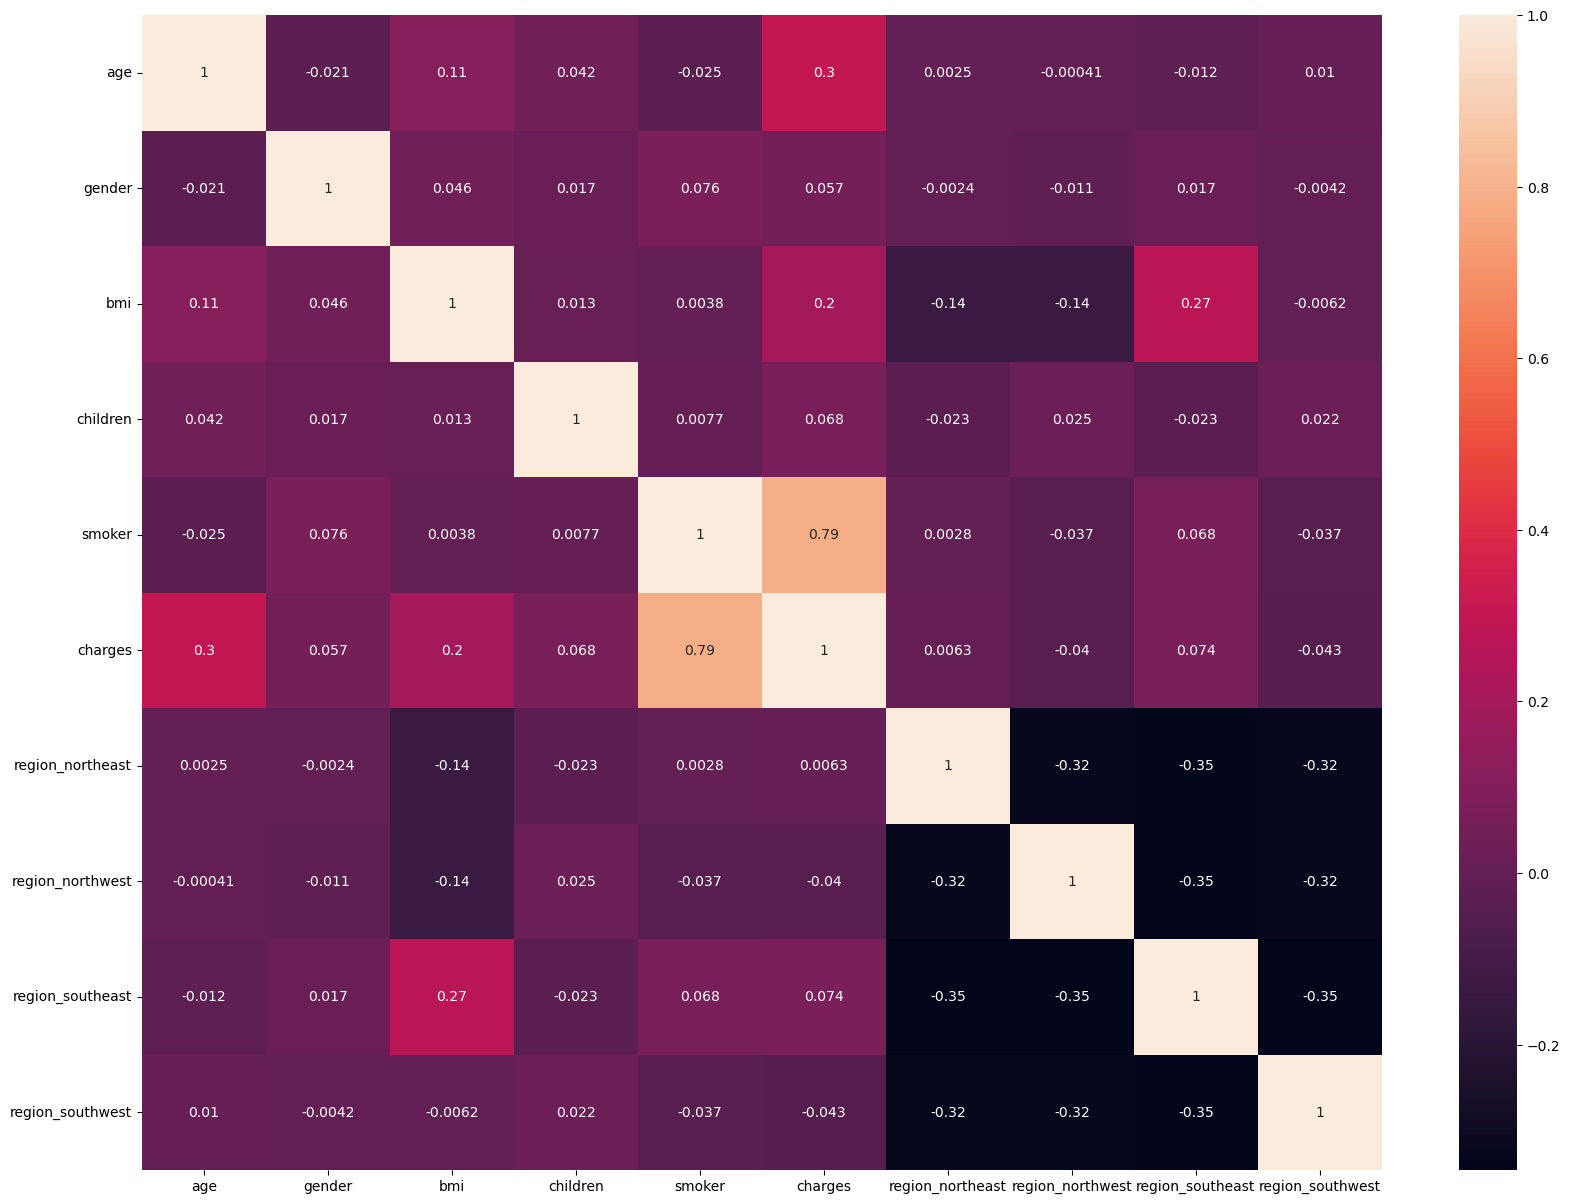

In [59]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)
plt.savefig('Medical_insurance_corr.png')

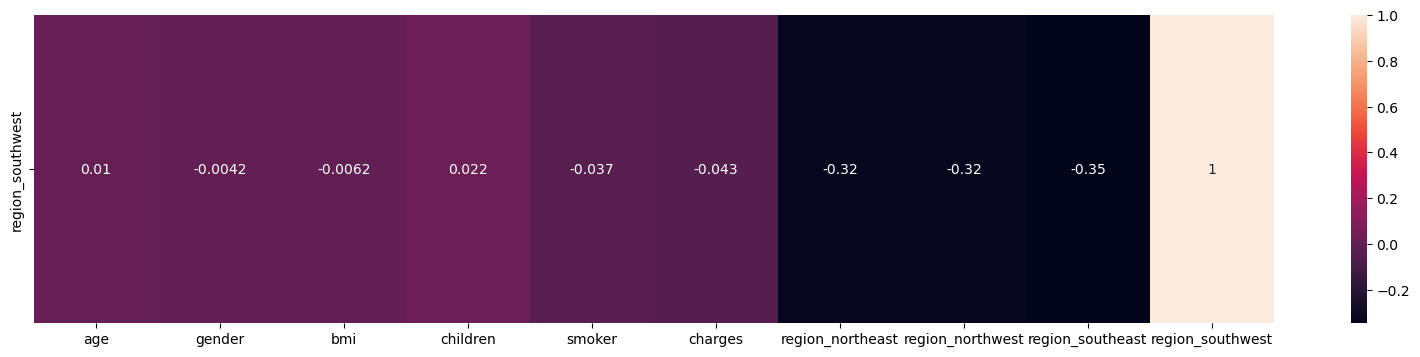

In [61]:
plt.figure(figsize = (20,4))
sns.heatmap(df.corr().tail(1),annot = True)
plt.savefig('Medical_insurance_corr.png')

##### 2.No Multicolinearity

In [64]:
x = df.drop('charges',axis = 1)
y = df['charges']

In [65]:
x.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [66]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
vif_list

[1.0168221490038107,
 1.0089001621005735,
 1.106629732428617,
 1.004010642137024,
 1.0120736649061481,
 8.603068768898924,
 8.636204844042892,
 11.535194994662813,
 9.218448877575907]

In [67]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)

vif_values = pd.Series(vif_list,index = x.columns)
vif_values

age                  1.016822
gender               1.008900
bmi                  1.106630
children             1.004011
smoker               1.012074
region_northeast     8.603069
region_northwest     8.636205
region_southeast    11.535195
region_southwest     9.218449
dtype: float64

<Axes: >

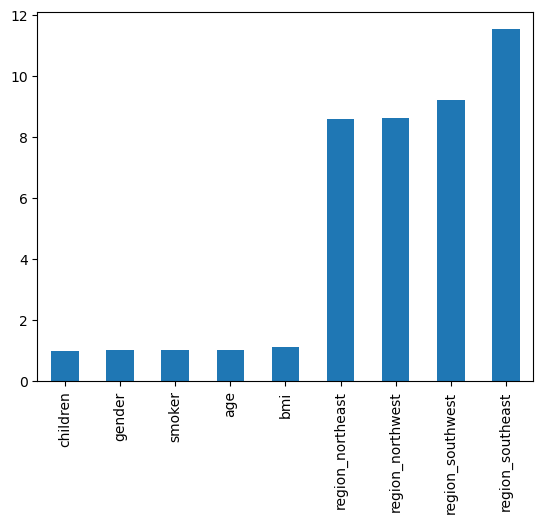

In [68]:
vif_values.sort_values().plot(kind = 'bar')

#### 6 Model Training

In [69]:
x

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [70]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

##### Data Spliting

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,
                                                random_state = 2)

In [72]:
x_train

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
882,21,0,22.135,0,0,1,0,0,0
505,37,1,30.875,3,0,0,1,0,0
798,58,0,33.100,0,0,0,0,0,1
792,22,0,23.180,0,0,1,0,0,0
201,48,0,32.230,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
466,60,0,28.700,1,0,0,0,0,1
299,48,0,28.880,1,0,0,1,0,0
493,61,1,43.400,0,0,0,0,0,1
527,51,0,25.800,1,0,0,0,0,1


In [73]:
y_train

882      2585.85065
505      6796.86325
798     11848.14100
792      2731.91220
201      8871.15170
           ...     
466     13224.69300
299      9249.49520
493     12574.04900
527      9861.02500
1192    13019.16105
Name: charges, Length: 1070, dtype: float64

In [74]:
x_test

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
17,23,1,23.845,0,0,1,0,0,0
1091,55,0,29.830,0,0,1,0,0,0
273,50,1,27.455,1,0,1,0,0,0
270,18,1,29.370,1,0,0,0,1,0
874,44,1,21.850,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
232,19,0,17.800,0,0,0,0,0,1
323,57,1,40.945,0,0,1,0,0,0
1337,61,0,29.070,0,1,0,1,0,0
1066,48,1,37.290,2,0,0,0,1,0


In [75]:
y_test

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
232      1727.78500
323     11566.30055
1337    29141.36030
1066     8978.18510
966     23967.38305
Name: charges, Length: 268, dtype: float64

#### Creating Instance of linear Regression

In [77]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [78]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [79]:
np.around(linear_reg.coef_,2)

array([  251.23,   -37.12,   332.82,   587.93, 23912.35,   527.73,
         148.54,  -256.76,  -419.51])

In [80]:
np.around(linear_reg.intercept_,1)

-12287.0

#### 7.Model Evaluation

##### 1.Testing Data Evaluation

In [82]:
y_pred = linear_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error is :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error is :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print(" Mean absolute Error is :",mae)

r2_value = r2_score(y_test,y_pred)
print(" R_Square value is :",r2_value)

n = x_test.shape[0]
k = x_test.shape[1]
adj_r1 = 1-((1-r2_value)*(n-1)/(n-k-1))
print("Adjusted R_Square value is :",adj_r1)

Mean Squared Error is : 38304871.34868592
Root Mean Squared Error is : 6189.092934242135
 Mean absolute Error is : 4279.860834219365
 R_Square value is : 0.7449415564623687
Adjusted R_Square value is : 0.7360441688971024


##### 2.Training Data Evaluation

In [83]:
y_pred_train  = linear_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error is :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error is :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print(" Mean absolute Error is :",mae)

r2_value = r2_score(y_train,y_pred_train)
print(" R_Square value is :",r2_value)

n = x_train.shape[0]
k = x_train.shape[1]
adj_r1 = 1-((1-r2_value)*(n-1)/(n-k-1))
print("Adjusted R_Square value is :",adj_r1)

Mean Squared Error is : 36100283.869831294
Root Mean Squared Error is : 6008.351177305742
 Mean absolute Error is : 4138.842762471066
 R_Square value is : 0.7520187377309014
Adjusted R_Square value is : 0.7499132364474845


In [84]:
r_squared_list = []
adj_r2_list = []
for i in range(1,x_train.shape[1]+1):
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(x_train.iloc[:,:i],y_train)
    r2_value = linear_reg_model.score(x_train.iloc[:,:i],y_train)
    r_squared_list.append(r2_value)
    
    n = x_train.shape[0]
    k = i
    adj_r2 = 1-((1-r2_value)*(n-1))/(n-k-1)
    adj_r2_list.append(adj_r2)

In [85]:
r_squared_list

[0.08242486448108555,
 0.08675147307312103,
 0.11139353810354524,
 0.11576196569662123,
 0.7511416233816596,
 0.7517410065768045,
 0.7519957671561439,
 0.7520187377309014,
 0.7520187377309014]

In [86]:
adj_r2_list

[0.08156571173247229,
 0.08503966702452337,
 0.10889276944905235,
 0.1124408838776414,
 0.7499721761231147,
 0.7503397328603989,
 0.7503610876552899,
 0.7501489449899469,
 0.7499132364474845]

In [87]:
new_x_train = x_train.copy()
new_x_train['TARGET'] = y_train
new_x_train.corr()['TARGET']

age                 0.287097
gender              0.064342
bmi                 0.191633
children            0.073217
smoker              0.792388
region_northeast    0.001456
region_northwest   -0.044487
region_southeast    0.068005
region_southwest   -0.027836
TARGET              1.000000
Name: TARGET, dtype: float64

In [88]:
r2_data = {'Correlation':new_x_train.corr()['TARGET'],
           'R_Squared':r_squared_list,
       'Adj R_Squared':adj_r2_list
           }
r2_df = pd.DataFrame(r2_data, index = x_train.columns)
r2_df

,Correlation,R_Squared,Adj R_Squared
age,0.287097,0.082425,0.081566
gender,0.064342,0.086751,0.085040
bmi,0.191633,0.111394,0.108893
children,0.073217,0.115762,0.112441
smoker,0.792388,0.751142,0.749972
region_northeast,0.001456,0.751741,0.750340
region_northwest,-0.044487,0.751996,0.750361
region_southeast,0.068005,0.752019,0.750149
region_southwest,-0.027836,0.752019,0.749913


#### Assumptions

##### 1.Normality of Residual

In [89]:
residual = y_train - y_pred_train
residual

882     1702.334606
505    -2362.597506
798    -1032.887490
792     1249.370755
201    -1958.743522
           ...     
466      717.707813
299     -870.738327
493    -4451.608035
527      580.256660
1192   -1162.390921
Name: charges, Length: 1070, dtype: float64

##### Checking Normality of residual

##### 1.kdeplot

<Axes: xlabel='charges', ylabel='Density'>

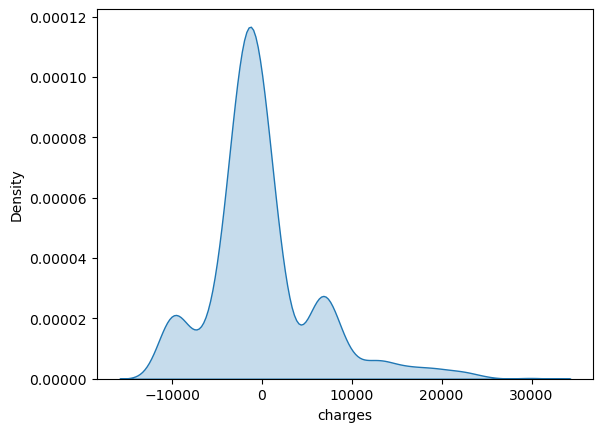

In [90]:
sns.kdeplot(residual,fill = True)

##### 2.Histplot

<Axes: xlabel='charges', ylabel='Count'>

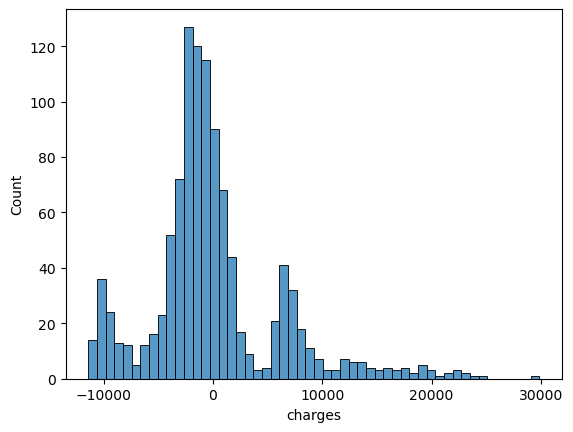

In [91]:
sns.histplot(residual)

<Axes: xlabel='charges', ylabel='Count'>

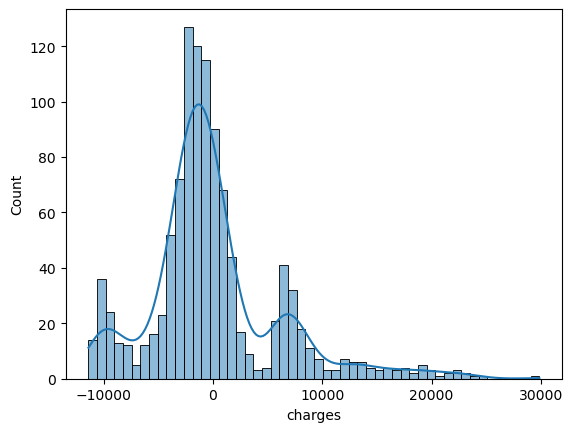

In [92]:
sns.histplot(residual,kde = True)

##### 3.Distplot

<Axes: xlabel='charges', ylabel='Density'>

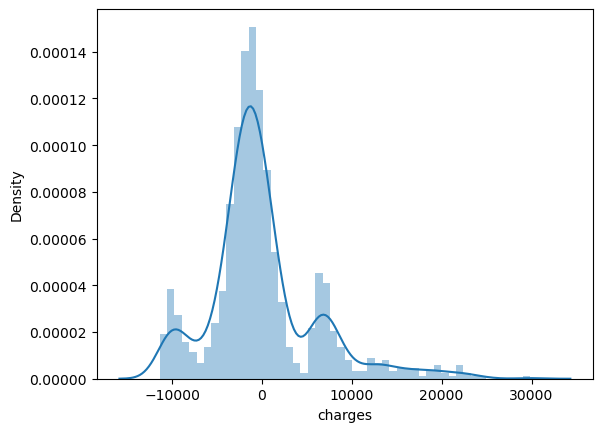

In [93]:
sns.distplot(residual)

#### 2.QQ Plot

In [94]:
import statsmodels.api as sm

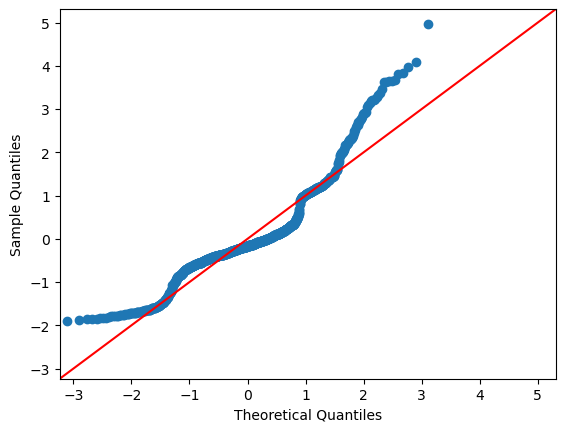

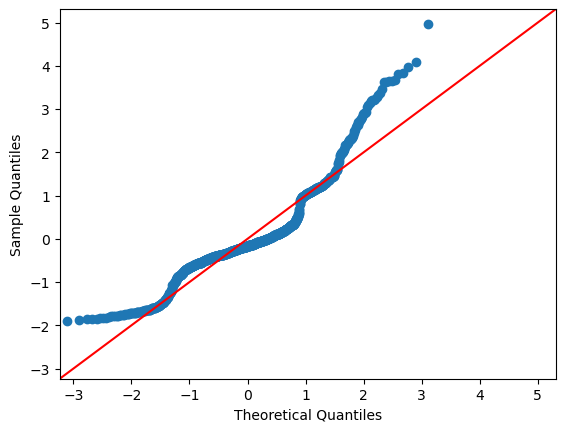

In [95]:
sm.qqplot(residual,line = "45",fit = True)

#### 3.Hypothesis testing

##### 1.shapiro testing

In [96]:
from scipy.stats import shapiro

In [97]:
stats,p_val = shapiro(residual)
print(stats)
print(p_val)

0.8980926275253296
4.7480311453064115e-26


In [98]:
_,p_val = shapiro(residual)
print('P Value is :',p_val)

if p_val >= 0.05:
    print('Data is normally distributed')
    print('Null hypothesis is true')
else:
    print('Data is not normally distributed')
    print('Alternate hypothesis is true')

P Value is : 4.7480311453064115e-26
Data is not normally distributed
Alternate hypothesis is true


##### 2.ks test

In [99]:
from scipy.stats import kstest

In [100]:
residual = y_train - y_pred_train
residual

882     1702.334606
505    -2362.597506
798    -1032.887490
792     1249.370755
201    -1958.743522
           ...     
466      717.707813
299     -870.738327
493    -4451.608035
527      580.256660
1192   -1162.390921
Name: charges, Length: 1070, dtype: float64

In [101]:
_,p_val = kstest(residual,'norm')
print('P Value is :',p_val)

if p_val >= 0.05:
    print('Data is normally distributed')
    print('Null hypothesis is true')
else:
    print('Data is not normally distributed')
    print('Alternate hypothesis is true')

P Value is : 0.0
Data is not normally distributed
Alternate hypothesis is true


##### 3.Normal test

In [102]:
from scipy.stats import normaltest

In [103]:
_, p_val = normaltest(residual)
print("P Value is :", p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
    print("NULL Hypothesis is True")
    
else:
    print("Data is not normally distributed")
    print("Alternate Hypothesis is True")

P Value is : 4.130789713138676e-53
Data is not normally distributed
Alternate Hypothesis is True


##### 4.Skewness

In [104]:
from scipy.stats import skew

Mean     : -2.7335840756091003e-12
Median   : -1011.6744545593126
Skewness : 1.2051632758566289
Skewness : 1.2034731363003943


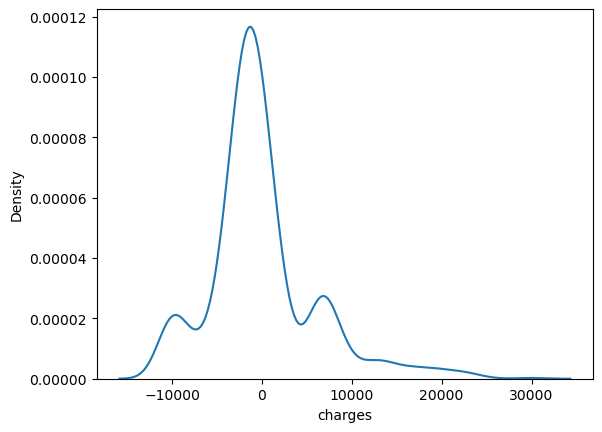

In [105]:
sns.kdeplot(residual)
s1 = residual
print('Mean     :',s1.mean())
print('Median   :',s1.median())
print('Skewness :',s1.skew())
print('Skewness :',skew(s1))

#### 4 .Homoscedascticity

In [106]:
y_train

882      2585.85065
505      6796.86325
798     11848.14100
792      2731.91220
201      8871.15170
           ...     
466     13224.69300
299      9249.49520
493     12574.04900
527      9861.02500
1192    13019.16105
Name: charges, Length: 1070, dtype: float64

In [108]:
y_pred_train
residual_train = y_train-y_pred_train
residual

882     1702.334606
505    -2362.597506
798    -1032.887490
792     1249.370755
201    -1958.743522
           ...     
466      717.707813
299     -870.738327
493    -4451.608035
527      580.256660
1192   -1162.390921
Name: charges, Length: 1070, dtype: float64

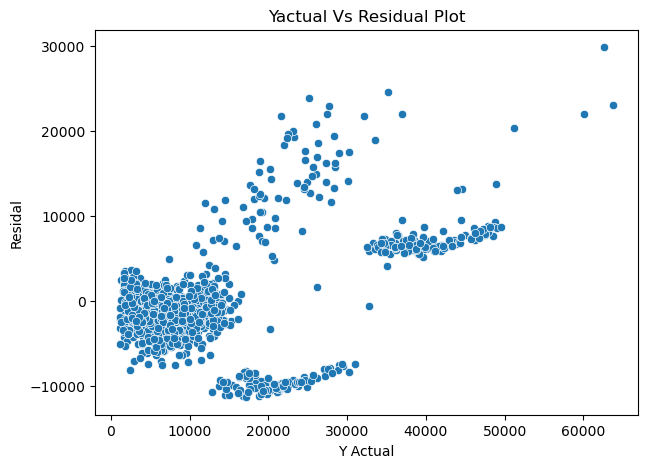

In [109]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = y_train, y = residual_train)
plt.xlabel('Y Actual')
plt.ylabel("Residal")
plt.title("Yactual Vs Residual Plot")
plt.savefig('Homoscedasticity.png')

#### Single Row Testing

In [110]:
x_test

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
17,23,1,23.845,0,0,1,0,0,0
1091,55,0,29.830,0,0,1,0,0,0
273,50,1,27.455,1,0,1,0,0,0
270,18,1,29.370,1,0,0,0,1,0
874,44,1,21.850,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
232,19,0,17.800,0,0,0,0,0,1
323,57,1,40.945,0,0,1,0,0,0
1337,61,0,29.070,0,1,0,1,0,0
1066,48,1,37.290,2,0,0,0,1,0


In [111]:
x_test[10:11]

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
575,58,0,27.17,0,0,0,1,0,0


In [112]:
linear_reg.predict(x_test[10:11])[0]

11475.438016415872

In [113]:
age = 30
gender = 'male'
bmi = 28.265
children = 2
smoker = 'yes'
region = 'northwest'

In [114]:
column_names = x.columns.tolist()
column_names

['age',
 'gender',
 'bmi',
 'children',
 'smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [115]:
x.shape[1]

9

In [116]:
linear_reg.n_features_in_

9

In [117]:
age = 30
gender = 'male'
bmi = 28.265
children = 2
smoker = 'yes'
region = 'northwest'

gender = gender_data[gender]
smoker = smoker_data[smoker]
region = 'region_'+region

region_index = column_names.index(region)
region_index

test_array = np.zeros([1,linear_reg.n_features_in_])
test_array[0,0] = age
test_array[0,1] = gender
test_array[0,2] = bmi
test_array[0,3] = children
test_array[0,4] = smoker
test_array[0,region_index] = 1

predicted_charges = np.around(linear_reg.predict(test_array)[0],3)
predicted_charges

29856.634

In [118]:
with open('linear_regression.pkl','wb') as f:
    pickle.dump(linear_reg,f)

In [119]:
project_data = {'Gender': gender_data,
               'Smoker': smoker_data,
               'Column Name': column_names}

with open('proj_data.json','w') as f:
    json.dump(project_data,f)